In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [2]:
# Load dataset and inspect the first few rows
df = pd.read_csv('Iris.csv')
print(df.head())

# Drop the extra column if it exists (e.g., an ID column)
if len(df.columns) > 5:
    df = df.drop(df.columns[0], axis=1)
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

# Data cleaning
df['class'] = df['class'].astype('category').cat.codes  # Convert categorical class to numeric
df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']] = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].astype(float)

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


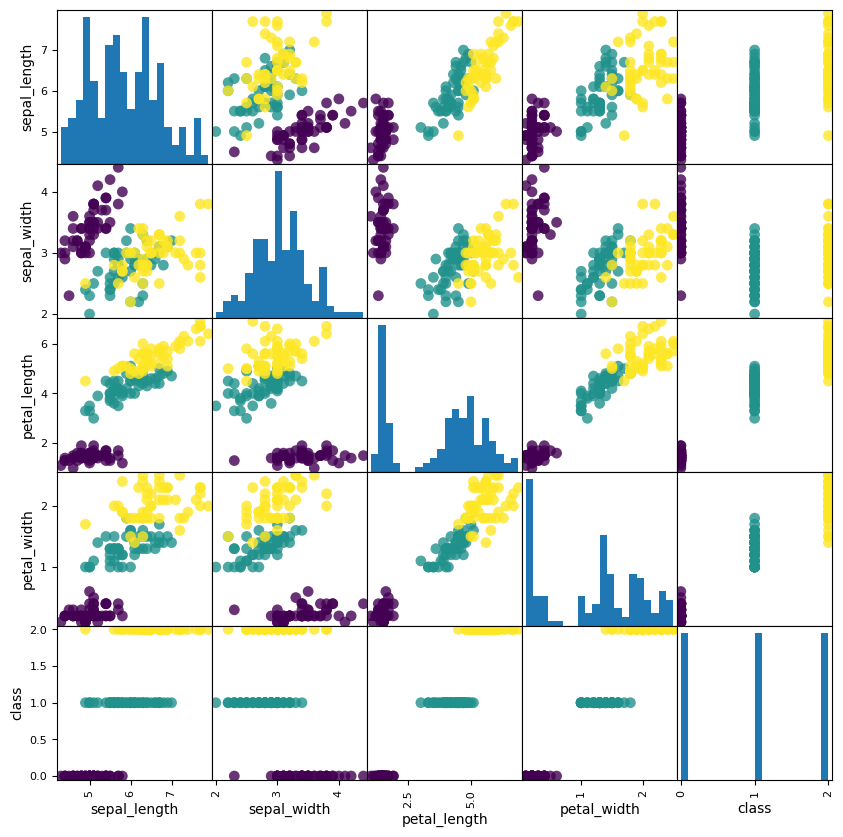

In [3]:
# Data visualization 
pd.plotting.scatter_matrix(df, c=df['class'], figsize=(10, 10), marker='o',
                           hist_kwds={'bins': 20}, s=60, alpha=.8)
plt.show()

In [4]:
# Feature Engineering
df['petal_area'] = df['petal_length'] * df['petal_width']

# Split data into features and target
X = df.drop('class', axis=1)
y = df['class']


In [5]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# Train a Support Vector Classifier
model = SVC(C=1.0, kernel='linear', random_state=42)
model.fit(X_train_scaled, y_train)

#cross-validation
cross_val_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
print(f'Cross-validation accuracy: {cross_val_scores.mean():.2f} ± {cross_val_scores.std():.2f}')

# Make predictions
y_pred = model.predict(X_test_scaled)


Cross-validation accuracy: 0.95 ± 0.04


In [7]:
# Calculate confusion matrix
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix)

Predicted   0   1   2
Actual               
0          19   0   0
1           0  12   1
2           0   0  13


In [8]:
# calculate metrics
TP = np.diag(confusion_matrix)  # True Positives
FP = confusion_matrix.sum(axis=0) - TP  # False Positives
FN = confusion_matrix.sum(axis=1) - TP  # False Negatives
TN = confusion_matrix.values.sum() - (TP + FP + FN)  # True Negatives

accuracy = (TP + TN).sum() / (TP + TN + FP + FN).sum()
precision = (TP / (TP + FP)).mean()
recall = (TP / (TP + FN)).mean()
f1_score = (2 * precision * recall) / (precision + recall)

# Print metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1_score:.2f}')

Accuracy: 0.99
Precision: 0.98
Recall: 0.97
F1 Score: 0.98
